In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv("r_coronavirus_users_comments_march21.csv")


In [6]:
df

,Post ID,Subreddit,Body,Author,Score,Publish Date,Permalink,Parent_id,Post_id
0,ghs4jlw,running,"Good, a bit white. Testing out the Gopro Hero ...",Mutiny32,1,2021-01-02 02:15:23,/r/running/comments/kobr64/how_was_your_new_ye...,t3_kobr64,t3_kobr64
1,ghs5lx0,running,https://imgur.com/Zn42vby.jpg,Mutiny32,1,2021-01-02 02:25:21,/r/running/comments/koaxgm/its_photo_friday_le...,t3_koaxgm,t3_koaxgm
2,ghu1x9t,AdvancedRunning,1. Lose 20 pounds by April 24 2. Run Zurich M...,Mutiny32,1,2021-01-02 16:49:08,/r/AdvancedRunning/comments/koenal/2021_goal_s...,t3_koenal,t3_koenal
3,gjslc8p,nfl,Is a Pop Tart ravioli?,Mutiny32,5,2021-01-19 04:47:27,/r/nfl/comments/l07gj6/chiefs_qb_mahomes_remai...,t1_gjsl19c,t3_l07gj6
4,gl3p61d,GoogleFi,I have this exact same situation. Also apparen...,Mutiny32,2,2021-01-28 16:29:50,/r/GoogleFi/comments/l6rpa9/activated_s215g/gl...,t1_gl3lqf6,t3_l6rpa9
...,...,...,...,...,...,...,...,...,...
2210370,glfetdv,ak47,thanks,bownt1,1,2021-01-31 01:42:14,/r/ak47/comments/l8vca3/what_would_you_upgrade...,t1_glfejji,t3_l8vca3
2210371,glk77ge,suggestmeabook,we are legion we are bob,bownt1,3,2021-02-01 05:08:15,/r/suggestmeabook/comments/l9uceg/books_about_...,t3_l9uceg,t3_l9uceg
2210372,gln2zl5,Conservative,im betting it will be super unconstitutional !,bownt1,41,2021-02-01 20:54:52,/r/Conservative/comments/lacbnw/many_us_gun_ow...,t3_lacbnw,t3_lacbnw
2210373,glnud2d,videos,i always wondered how they got the bones out,bownt1,2,2021-02-01 23:56:30,/r/videos/comments/lagnfs/1980s_mcrib_commerci...,t3_lagnfs,t3_lagnfs


In [27]:
df_combs=pd.DataFrame(df.groupby(['Subreddit','Author']).groups.keys(),columns=["Subreddit","Author"])

60


<AxesSubplot:ylabel='Frequency'>

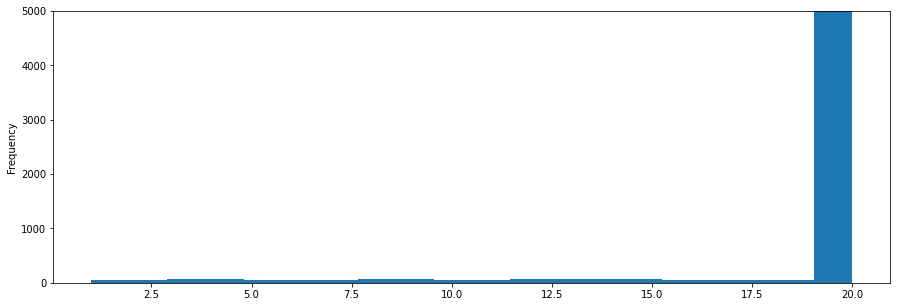

In [6]:
counts=df["Author"].value_counts()
counts[counts>20]=20
print(counts[counts==1].shape[0])
counts.plot.hist(bins=20,ylim=(0,5000),figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

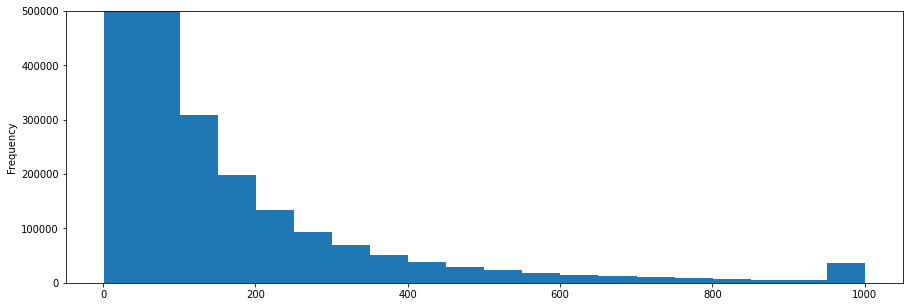

In [22]:
lens=df["Body"].str.len()
lens[lens>1000]=1000
lens.plot.hist(bins=20,ylim=(0,500000),figsize=(15,5))


<AxesSubplot:ylabel='Frequency'>

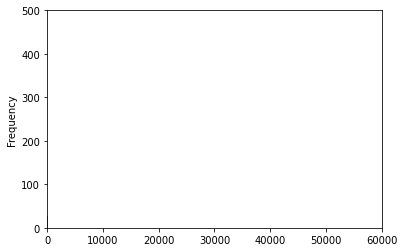

In [32]:
counts.plot.hist(bins=30,ylim=(0,500),xlim=(0,60000))

<AxesSubplot:ylabel='Frequency'>

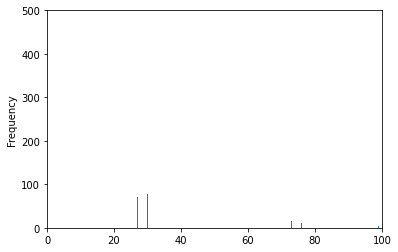

In [33]:
counts.plot.hist(bins=5000,ylim=(0,500),xlim=(0,100))

In [34]:

def plot_hist(data, column, title="Histogram", title_x="X Axis", title_y="Y Axis", bins=10, save=None):

    plt.ioff()

    items = bins
    if column=="reviews": data.loc[data[column]>=20]=20
    plt.hist(data[str(column)], bins=range(1, items + 2), edgecolor='black',
             align="left")  # arguments are passed to np.histogram
    labels = list(map(lambda x: str(x), range(1, items + 1)))
    labels[-1] = "≥" + labels[-1]
    plt.xticks(range(1, items + 1), labels)
    plt.title(str(title))

    plt.xlabel(title_x)
    plt.ylabel(title_y)

    if save is None:
        plt.show()
    else:
        plt.savefig(str(save))
    
    plt.cla()

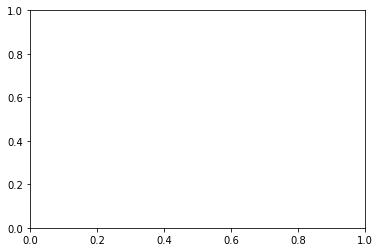

In [84]:
dataset="covid_march21_userdata"
os.makedirs(dataset,exist_ok=True)

sts0 = df.groupby('Author').apply(
			lambda x: pd.Series({"comments": len(x["Subreddit"].unique())})).reset_index()
plot_hist(sts0, "comments", title="", title_x="Num. of Subreddits", title_y="Num. of users", bins=20,
				  save=dataset+"/"+"hist_subreddits_pr_usr.pdf")

sts1 = df.groupby('Subreddit').apply(
	lambda x: pd.Series({"reviews": len(x["Author"].unique())})).reset_index()
plot_hist(sts1, "reviews", title="", title_x="Num. of users", title_y="Num. of Subreddits", bins=20,
			save=dataset+"/"+"hist_usrs_per_subreddit.pdf")

sts2 = df.groupby(['Author', 'Subreddit']).size().reset_index(name="fotos")
plot_hist(sts2, "fotos", title="", title_x="Num. of Comments in Subreddit", title_y="Num. of users", bins=20,
			save=dataset+"/"+"hist_comments_per_user_per_subreddit.pdf")

sts3 = df.groupby(['Subreddit','Author']).size().reset_index(name="Count").groupby('Author').mean()
plot_hist(sts3, "Count", title="", title_x="Avg. No. of Comments per Subreddit", title_y="No. of users", bins=20,
			save=dataset+"/"+"hist_avg_comments_per_subreddit_per_user.pdf")

In [35]:
len(df["Subreddit"].unique())

30279

In [59]:
df_combs=pd.DataFrame(df.groupby(['Subreddit','Author']).groups.keys(),columns=["Subreddit","Author"])



In [37]:
comb_sizes=df.groupby(['Subreddit','Author']).size().reset_index()

comb_sizes.columns=['Subreddit','Author','Count']

comb_sizes.groupby('Author').mean()

,Count
Author,
----NSA----,3.225806
--Blackjack-,5.823529
--Edog--,2.000000
--_-_o_-_--,5.052632
--_l,2.325581
...,...
zyklon_snuggles,47.500000
zypherman,4.333333
zz23ke,3.769231


30279
25816


,Count
Author,
----NSA----,3.225806
--Blackjack-,5.823529
--Edog--,2.000000
--_-_o_-_--,5.052632
--_l,2.325581
...,...
zyklon_snuggles,47.500000
zypherman,4.333333
zz23ke,3.769231


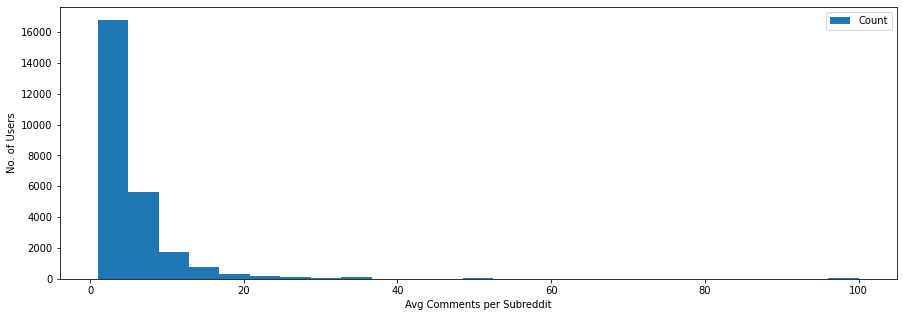

In [39]:
dataset="covid_march21_userdata"
comb_sizes.groupby('Author').mean().plot.hist(bins=25,figsize=(15,5),xlabel='Avg No. of Comments Per Subreddit')

plt.ylabel('No. of Users')
plt.xlabel('Avg Comments per Subreddit')
plt.savefig(dataset+"/"+"avg_comments_per_sureddit_per_user.pdf")
print(len(pd.unique(df["Subreddit"])))
print(len(pd.unique(df["Author"])))

df.groupby(['Subreddit','Author']).size().reset_index(name="Count").groupby('Author').mean()

In [40]:
keywords=["vaccine", "covid", "corona", "coronavirus", "sars-cov-2", "vaccine","vaccinat","antivax", "anti-vax", "vaxxe","pfizer","moderna","biontech","jansenn","sinopharm","astrazeneca","sputnik v","novavax","flattening the curve", "flatten the curve", "immunity", "pandemic", "world health organization", "face mask"]

def is_covid_related(row):
    if any(k.lower() in str(row["Body"]).lower() for k in keywords):
        return 1
    else:
        return False

df["is_covid_related"]=df.apply(lambda row: is_covid_related(row), axis=1)


KeyboardInterrupt: 

2117699
92676
22.850565410678062


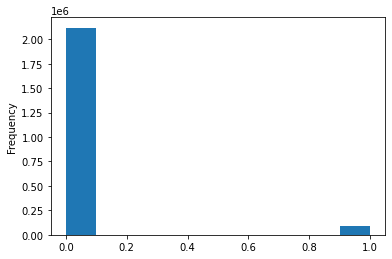

In [41]:
df.loc[ df["is_covid_related"] == False, "is_covid_related"] = 0
df["is_covid_related"].plot.hist()
print(len(df["is_covid_related"][df["is_covid_related"]==0]))
print(len(df["is_covid_related"][df["is_covid_related"]==1]))

print(len(df["is_covid_related"][df["is_covid_related"]==0])/len(df["is_covid_related"][df["is_covid_related"]==1]))


<AxesSubplot:ylabel='Frequency'>

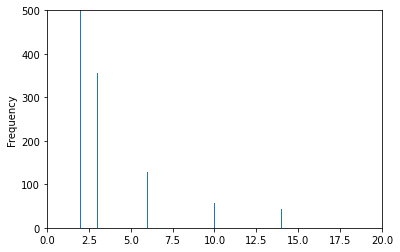

In [47]:
covid_twits_per_subreddit=df[df["is_covid_related"]==1]["Subreddit"].value_counts()
# covid_twits_per_subreddit.plot.hist(bins=1000,xlim=(0,500),ylim=(0,500))

covid_twits_per_subreddit[covid_twits_per_subreddit>20]=20
covid_twits_per_subreddit.plot.hist(bins=20,xlim=(0,20),ylim=(0,500))

In [43]:
len(covid_twits_per_subreddit)

4711